In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


816030787

The file was not reading in without hard writing the encoding

In [ ]:
df = pd.read_csv('/content/DisneylandReviews.csv', encoding='ISO-8859-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


# 1.1 Preprocessing, Data Organization and Visualisation

In [ ]:
df.shape

(42656, 6)

In [ ]:
pos = df[df['Rating']>3]
neg = df[df['Rating']<3]
print(pos.shape, neg.shape)

(33921, 6) (3626, 6)


In [ ]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(3626, 6) (3626, 6)


In [ ]:
#df = shuffle(df)
#df.head()

In [ ]:
#Removes neutral ratings
df = df[df['Rating'] !=3]

#X holds the Review Text Column of the df
X = df['Review_Text']
Val = df['Review_Text']
#Creates a list,y, that classifies ratings as being positive or negative where 0 means negative and 1 means positive
y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Rating'].map(y_map)

In [ ]:
X.head(5)

,Review_Text
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


In [ ]:
y.head(5)

,Rating
0,1
1,1
2,1
3,1
4,1


In [ ]:
df['Sentiment'] = y

In [ ]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1


**1.1**

---


**Part 2**

In [ ]:
import string


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install autocorrect
from autocorrect import Speller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=1e1d58510a5f40afa85945cc3dab798416d022348d54ad1368a4e5fb3b593b5a
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect


In [ ]:
NoPunc = []
for review in df['Review_Text']:
  #Split review into words
  #words = review.split(' ')

  #Did this as some of the reviews would not split properly as there was no space between
  #the fullstop and the words.
  review = review.replace('.',' ')

  #Use Tokenize to split words up------------------------------------------------------------------
  import nltk
  nltk.download('punkt_tab')
  words = word_tokenize(review)

  #Convert words into common letters---------------------------------------------------------------
  words = [word.lower() for word in words]

  #For Spelling Corrections however took way too long to execute-----------------------------------
  #spell = Speller(lang='en')
  #words = [spell(word) for word in words]

  #Remove Punctuation from each word---------------------------------------------------------------
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in words]

  #Removes remaining tokens that are not alphabetic------------------------------------------------
  words = [word for word in stripped if word.isalpha()]

  #Removes StopWords-------------------------------------------------------------------------------
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]

  NoPunc.append(words);

df['review_content_clean']= NoPunc

pd.set_option('display.max_colwidth', None)
df

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-dat

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
1      670682799       4     2019-5           Philippines   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
...          ...     ...        ...                   ...   
42639    2506710       2    missing         United States   
42640    2450090       2    missing        United Kingdom   
42641    2448439       2    missing        United Kingdom   
42643    2378922       2    missing             Australia   
42647    2216235       2    missing         United States   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

**1.1**

---
Part 3


In [ ]:
#! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


In [ ]:
Sentences = []
for review in df['review_content_clean']:
  sentence = ' '.join(review)
  Sentences.append(sentence);

#Let X from earlier which held a column of the reviews become strings made up of only the cleaned words
X = Sentences

In [ ]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 3397801 words in the combination of all reviews.


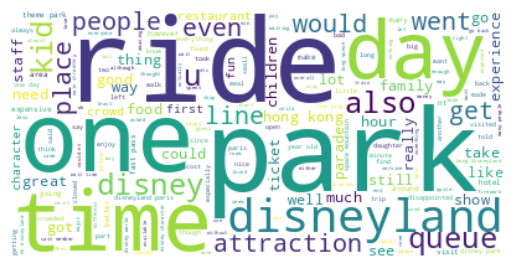

In [ ]:
wordcloud = print_cloud(Sentences)
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)

# 1.2 Text Classification

## Select a metric to access the performance of your classifier and provide a brief explanation of why you chose that metric.


I chose to use the f1_score as allows for a balanced assessment of the data's precision and also its recall.


## Logistic Regression

In [ ]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    f1_score_calc = f1_score(y_test,y_pred)
    if coef_show == 1:
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')
        print(coeff_df.tail(20).to_string(index=False))
    return f1_score_calc

In [ ]:
#Logistic Regression------------------------------------------------------------
countv = CountVectorizer(stop_words = 'english')
LRM_wordcount = text_fit(X, y, countv, LogisticRegression())
print(LRM_wordcount)

# features: 18711
# train records: 5439
# test records: 1813
Model Recall: 0.947136563876652

-Top 20 positive-
    Word  Coefficient
    easy     1.468500
  lovely     1.442034
 awesome     1.269192
   liked     1.238783
     mtr     1.199210
 enjoyed     1.168806
 perfect     1.156875
 smaller     1.149636
    iron     1.137888
downside     1.100543
  plenty     1.084731
   klook     1.068709
    nice     1.064717
   great     1.020827
 longest     1.015384
 english     1.011476
   cover     1.006711
   heart     0.996403
  highly     0.990009
 grizzly     0.982836

-Top 20 negative-
          Word  Coefficient
        boring    -1.101051
        priced    -1.121792
      stroller    -1.177110
          hour    -1.178393
         worse    -1.250303
         dirty    -1.255863
disappointment    -1.255908
         waste    -1.266908
         paris    -1.278074
        closed    -1.292964
    overpriced    -1.306354
         worst    -1.314024
          skip    -1.346506
   overcrowded 

In [ ]:
#TFDIF
tfidf = TfidfVectorizer(stop_words = 'english')
LRM_tfidf = text_fit(X, y, tfidf, LogisticRegression())
print(LRM_tfidf)

# features: 18711
# train records: 5439
# test records: 1813
Model Recall: 0.9416299559471366

-Top 20 positive-
     Word  Coefficient
    great     4.225238
      fun     3.279494
     hong     3.093173
     easy     3.075013
     kong     3.031276
  enjoyed     3.012530
      day     2.990516
   parade     2.979969
      mtr     2.965609
  smaller     2.919097
    visit     2.753488
    loved     2.747381
  amazing     2.641226
       hk     2.616263
     good     2.579493
  awesome     2.556884
fireworks     2.460181
     nice     2.401452
    shows     2.330101
     king     2.131284

-Top 20 negative-
         Word  Coefficient
          way    -1.871132
          pay    -1.912222
       french    -1.984837
           nt    -2.055543
      studios    -2.074012
   overpriced    -2.149462
        waste    -2.172766
        worst    -2.267478
disappointing    -2.413966
         told    -2.564807
        staff    -2.600827
        hours    -2.686615
         rude    -2.972796
       

In [ ]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(score_func=f_classif, percentile=select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    f1_score_calc = f1_score(y_test,y_pred)
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')
        print(coeff_df.tail(20).to_string(index=False))
    return f1_score_calc

In [ ]:
#TFDIF + ngram
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
LRM_tfidf_n = text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 268009
# features after applying select percentile: 134004
# train records: 5439
# test records: 1813
Model Recall: 0.9449339207048458

-Top 20 positive-
                  Word  Coefficient
fireworks cancellation     4.462096
        queue surprise     3.616970
        imagine kiddie     3.270646
           print image     3.186863
       looking parades     3.139221
             mins come     3.131611
            hour drive     3.086107
                greasy     3.069627
           klook month     2.948544
    australia lifetime     2.913830
         feel distinct     2.888034
            enjoy wait     2.833473
           inside glad     2.768101
          feet parades     2.699308
         attitude rate     2.686062
          forget enjoy     2.682489
          imagine felt     2.581389
            good sight     2.517428
       renovation went     2.427465
         cheap venture     2.131999

-Top 20 negative-
              Word  Coeff

## SVM Modeling

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
#Support Vector Machine model on word count
countv = CountVectorizer(stop_words = 'english')
SVM_wordcount = text_fit(X, y, countv, LinearSVC())
print(SVM_wordcount)

# features: 18711
# train records: 5439
# test records: 1813
Model Recall: 0.9229074889867841

-Top 20 positive-
      Word  Coefficient
     heart     0.720385
     youth     0.720384
   rushing     0.710295
    lovely     0.657391
      easy     0.653937
 fantastic     0.621201
   longest     0.605081
    plenty     0.596868
      seen     0.588452
  paradise     0.586929
     teens     0.582220
      iron     0.577590
    mystic     0.574648
    change     0.566687
  downside     0.563873
     klook     0.559380
     liked     0.540710
       joy     0.539205
      seat     0.528438
particular     0.527293

-Top 20 negative-
          Word  Coefficient
disappointment    -0.656217
      supposed    -0.666262
          dine    -0.666636
  disappointed    -0.669112
 disappointing    -0.672408
       fortune    -0.675690
         worse    -0.684569
         views    -0.726495
        effort    -0.733508
            uo    -0.743886
          rude    -0.747762
   overcrowded    -0.756414


In [ ]:
#TFDIF
tfidf = TfidfVectorizer(stop_words = 'english')
SVM_tfidf = text_fit(X, y, tfidf, LinearSVC())
print(SVM_tfidf)

# features: 18711
# train records: 5439
# test records: 1813
Model Recall: 0.9460352422907489

-Top 20 positive-
    Word  Coefficient
   great     2.111935
    easy     1.801658
  lovely     1.793419
    nice     1.709317
 smaller     1.674969
     fun     1.595874
     mtr     1.594437
 awesome     1.592706
downside     1.533009
   liked     1.496621
   loved     1.476974
 enjoyed     1.466183
   klook     1.430677
    iron     1.430116
 amazing     1.420853
    good     1.402754
     day     1.391336
 longest     1.390028
   visit     1.375253
  parade     1.352295

-Top 20 negative-
          Word  Coefficient
    disgusting    -1.335945
    ridiculous    -1.367264
        people    -1.385351
         waste    -1.423490
         staff    -1.437544
   overcrowded    -1.454844
          thou    -1.529781
         worse    -1.629054
          told    -1.637353
disappointment    -1.639671
         worst    -1.647656
 disappointing    -1.856593
          hour    -1.862866
  disappointed

In [ ]:
#TFDIF + ngram
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
SVM_tfidf_n = text_fit_v2(X, y, tfidf_n, LinearSVC(), 50, 1)
print(SVM_tfidf_n)

# features before applying select percentile: 268009
# features after applying select percentile: 134004
# train records: 5439
# test records: 1813
Model Recall: 0.9581497797356828

-Top 20 positive-
                  Word  Coefficient
fireworks cancellation     2.726401
           klook month     2.159976
        queue surprise     2.141707
    australia lifetime     1.999069
                greasy     1.938134
       renovation went     1.935320
         attitude rate     1.897026
          feet parades     1.857289
            good sight     1.842667
          forget enjoy     1.830790
         cheap venture     1.825335
           inside glad     1.721742
            hour drive     1.707538
        imagine kiddie     1.695662
                   bro     1.547260
         feel distinct     1.522058
         took attempts     1.473868
             fine time     1.446583
           real season     1.379414
        size strollers     1.353800

-Top 20 negative-
              Word  Coeff

## Plot a bar graph showing the performance of each of the experiments.

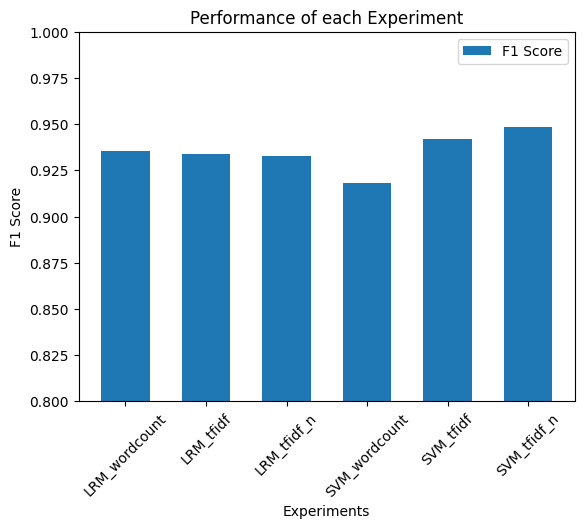

In [ ]:
import matplotlib.pyplot as plt

# Pass the x and y cordinates of the bars to the
# function. The label argument gives a label to the data.
x=['LRM_wordcount', 'LRM_tfidf', 'LRM_tfidf_n', 'SVM_wordcount', 'SVM_tfidf', 'SVM_tfidf_n']
y= [LRM_wordcount, LRM_tfidf, LRM_tfidf_n, SVM_wordcount, SVM_tfidf, SVM_tfidf_n]
plt.bar(x,y, width=.6, label="F1 Score")
plt.legend()
plt.ylim(0.8, 1)
plt.xticks(x)
plt.xticks(rotation=45)
# The following commands add labels to our figure.
plt.xlabel('Experiments')
plt.ylabel('F1 Score')
plt.title('Performance of each Experiment')

plt.show()

This vertical bar graph shoes the performances of each experiment. We note that SVM_wordcount has he lowest F1_score and the SVM_tfidf_n has the highest performance score. However on average they all perform similarly.

# 1.3 Topic Modeling

## 2 [When choosing the number of topics give a brief explanation of why that number was chosen]


The number of topics impacts the topic models significantly, thus i tried multiple values and gave preference to 10 topics as i felt it gave a broad enough spectrum of values for the models

I chose 5 topics for SVD as the words clusters are very large and would have overlaps

## 1 Using TFIDF and Count Vectorizer models imported for sklearn, perform topic modelling using the following topic modeling algorithms:

In [ ]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [ ]:
documents = list(X)[0:10000]
print(len(documents))

7252


In [ ]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
no_topics = 10

**[NMF] Non Negative Matrix Factorization**

In [ ]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
food queue queues expensive good children long rides staff time


queues hour long never saw disney characters walking around food prices high ticket get expensive


going back expensive queue hour minute ride rides great get queues long


queue attractions wear comfortable shoes prepare queue day food really expensive outside food drinks allowed check bags go queue go long managed quite efficiently souvenirs pricey overall fun queue lot


one time never staff unkind queues hours long food bad expensive toilets dirty signs clear made spend much money get


Topic 1:
kong hong disneyland smaller visit fun visited tokyo small time


hong kong disneyland family last year remember weather starting day bad however went hong kong disneyland second day fortunately weather second day better arrived saw amazing thing people hong kong disneyland argued weather case played games faster however compare tokyo disneyland hong kong disneyland smaller equipment hong kong disneyla

**[LDA] Latent Dirichlet Allocation**

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [ ]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [ ]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
eur creates rear rugby balls tenth toast nostalgia hockey shrimp


love place fun food nostalgia creates even great mickey fan enough avenues enjoy kids even adults enjoy


things amazing price admission terrible food huge trashy crowd nothing gaudy carnival inappropriately sexualized images designed appeal children


disney trapped nostalgia vacuum longer seeking lead entertainment market rather relive walts glory days means keep tiki room going balance historical kind contemporary offering show entertainment experience exist rear view time embrace epcot tradition think


last month parents friends went hong kong arrived hong kong february tenth weather cool sunny went hotel first clean service good almost everything perfect drawback rooms hotel small nt enough place play rest went restaurant food delicious beef balls roasted goose shrimp ravioli herbal tea eating dad saw store selling ipads next store since new ipad really fantastic went disneyland day arrive

**[SVD] Single Value Decomposition**

In [ ]:
#SVD
no_topics = 5
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [ ]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
park disney rides nt disneyland day time ride people food


experience disneyland paris first would like point normally enjoy disneyland paris walt disney world florida park theming atmosphere stage presence brilliant good years since family went disneyland paris looking forward extended year anniversary experience expensive nt fool food drink park disney village expensive captive market merchandise expensive cases uk based disney store staff natively speaks french nt expect speak english extra magic hours allow guests staying disney hotels enter disneyland park hours official opening unbelievably busy mid afternoon turnstiles showed visitors enjoy smoking great get annoyed holiday booked direct via disneyland paris website january year adults children girls years old took days extra free offer opted days nights stay site sequoia lodge park tickets would provided entire stay breakfast hotel also included flights booked direct flybe manchester airport shuttle tr

## 3. Discuss based on the top 10 words each of the algorithms choose for each topic cluster what category the topics fall under.

### NMF

Topic 0:
A mix of good and bad and associated highly with the queues. There were some positive sentiments such as the words fun and good. However the words expensive, long, and dirty also are negative.
Overall I would say topic 0 is surprisingly positive.

Topic 1:
Overall I say topic 1 is positive. It is assosciated highly with hong kong disneland and positive words such as fun


Topic 2:
Overall topic 2 is positive and associated highly with Florida's disneyland.
However we see comparisions to other disneyland locations that are not very positive leaning

Topic 3:
Overall topic 3 is negative. It's highly assosciated with the disney fast passes and also accessibility. Neither of which seemed to be held to high standards in these word clusters

Topic 4:
Topic 4 is very positive and assosciated with HongKong branch of disney


Topic 5:
Topic 5 is very positive and assosciated with the disney fireworkds show

Topic 6:
Topic 6 is very positive and assosciated with the kids enjoyment of the parks


Topic 7:
TOpic 7 is associated with the small size of one of the disney parks. It's not leaning positive or negative and is more neutral or simply "factual"

Topic 8:
Topic 8 is negative and associated with closed ammenities or attractions

Topic 9:
This topic seems to be negative experiences at the paris disneylang branch


###LDA

Topic 0:
This topic is mostly positive and seems to be heavily assosciated with food

Topic 1:
Topic 1 is negative and assosciated with poor ettiquette of guests

Topic 2:
Topic 2 is a bit neutral and contains words relating to tourists and nostalgia


Topic 3:
Topic 3 seems to be negative and mostly about others experience with the park in terms of ammenties, characters and also actor safety

Topic 4:
Topic 4 seems to be negative and is mostly associated with food, ammenities and overall experience

Topic 5:
Topic 5 seems Positive and mostly relating to Disneyland hongkok

Topic 6:
Topic 6 is negative and relates to wait times for tickets and also for rides

Topic 7:
Topic 7 is negative and about unprofessionalism of staff

Topic 8:
Topic 8 is also negative and about unprofessionalism of staff


Topic 9:
Topic 9 is bordering on neutral and about ammenities and persons at the park


###SVM

Topic 0:
Topic 0 seems negative and mostly about the times of disneyland's opening, food service and other guests

Topic 1:
Topic 1 seems to be negative and about disney orlando or comparing it to other branches, staff behaviours and food court times/prices

Topic 2:
Topic 2 seems to be negative and about long queues and the wait while having children

Topic 3:
Topic 3 is about negative times at disneyland paris

Topic 4:
Topic 4 is also about negative times at disneyland paris


















